# Understanding the relationship/s between MEVs

Trying Timeseries appraoch, Darts

Models tested:
- LSTM (RNN)
- TCN
- Nbeats

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 50.3 MB/s 
     |████████████████████████████████| 11.2 MB 42.1 MB/s 
     |████████████████████████████████| 585 kB 46.2 MB/s 
     |████████████████████████████████| 1.4 MB 48.8 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 179 kB 72.8 MB/s 
     |████████████████████████████████| 793 kB 54.9 MB/s 
     |████████████████████████████████| 381 kB 66.6 MB/s 
     |████████████████████████████████| 944 kB 50.4 MB/s 
     |████████████████████████████████| 140 kB 65.3 MB/s 
     |████████████████████████████████| 419 kB 68.1 MB/s 
     |████████████████████████████████| 596 kB 50.2 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
     |████████████████████████████████| 94 kB 4.7 MB/s 
     |█████████████████████████████

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 4.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


**Import Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [ ]:
print('TF Version:', tf.__version__)

TF Version: 2.8.2


**Upload datasets**

In [ ]:
mev = pd.read_csv('MEV_Selected_top_countries.csv',sep=";")

In [ ]:
mev.head()

,Date,Korea_Nominal_GDP,Korea_CPI,Korea_Unemployment_rate,Korea_Residential_property_index,US_Nominal_GDP,US_CPI,US_Unemployment_rate,US_Residential_property_index,Canada_Nominal_GDP,...,Switzerland_Residential_property_index,UK_Nominal_GDP,UK_CPI,UK_Unemployment_rate,UK_Residential_property_index,D_Nominal_GDP,D_CPI,D_Unemployment_rate,D_Residential_property_index,Unnamed: 25
0,1975-01-01,2370600,9.012579,NaN,63.2476,1616.116,52.566667,8.27,60.02,167572,...,36.2205,26777,14.043801,3.969991,5.4978,NaN,39.142725,3.6,128.1556,NaN
1,1975-04-01,2583900,9.738219,NaN,65.3178,1651.853,53.200000,8.87,60.96,173748,...,35.7642,28090,15.371077,4.339689,5.6187,NaN,39.903834,4.2,127.2398,NaN
2,1975-07-01,2690300,10.384638,NaN,67.5589,1709.820,54.266667,8.47,61.16,182328,...,35.4102,29219,16.046223,4.699658,5.7999,NaN,40.208277,4.3,126.3735,NaN
3,1975-10-01,2898800,10.810701,NaN,69.3324,1761.831,55.266667,8.30,62.22,188532,...,35.2497,30850,16.598615,5.071648,5.8603,NaN,40.512721,4.2,125.2582,NaN
4,1976-01-01,3275500,11.030391,NaN,69.9437,1820.487,55.900000,7.73,62.86,196288,...,34.4582,32405,17.197039,5.298913,5.9812,NaN,41.186845,4.1,123.4281,NaN


**General cleaning**

In [ ]:
mev = mev.iloc[:,:-1]
mev['Date'] = pd.to_datetime(mev['Date'], format='%Y-%m-%d')

mev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    188 non-null    datetime64[ns]
 1   Korea_Nominal_GDP                       188 non-null    int64         
 2   Korea_CPI                               188 non-null    float64       
 3   Korea_Unemployment_rate                 128 non-null    float64       
 4   Korea_Residential_property_index        188 non-null    float64       
 5   US_Nominal_GDP                          188 non-null    float64       
 6   US_CPI                                  188 non-null    float64       
 7   US_Unemployment_rate                    188 non-null    float64       
 8   US_Residential_property_index           188 non-null    float64       
 9   Canada_Nominal_GDP                      188 non-null  

In [ ]:
mev.isnull().sum()

Date                                       0
Korea_Nominal_GDP                          0
Korea_CPI                                  0
Korea_Unemployment_rate                   60
Korea_Residential_property_index           0
US_Nominal_GDP                             0
US_CPI                                     0
US_Unemployment_rate                       0
US_Residential_property_index              0
Canada_Nominal_GDP                         0
Canada_CPI                                 0
Canada_Unemployment_rate                   0
Canada_Residential_property_index          0
Switzerland_Nominal_GDP                   20
Switzerland_CPI                            0
Switzerland_Unemployment_rate              0
Switzerland_Residential_property_index     0
UK_Nominal_GDP                             0
UK_CPI                                     0
UK_Unemployment_rate                       0
UK_Residential_property_index              0
D_Nominal_GDP                             64
D_CPI     

**3 columns are missing data due to reporting time horizon difference**

In [ ]:
impute = SimpleImputer(strategy='mean')

mev_imputed = pd.DataFrame(impute.fit_transform(mev.iloc[:,1:]), columns=mev.iloc[:,1:].columns)
mev_imputed['Date'] = mev['Date']
mev_imputed.head()

,Korea_Nominal_GDP,Korea_CPI,Korea_Unemployment_rate,Korea_Residential_property_index,US_Nominal_GDP,US_CPI,US_Unemployment_rate,US_Residential_property_index,Canada_Nominal_GDP,Canada_CPI,...,Switzerland_Residential_property_index,UK_Nominal_GDP,UK_CPI,UK_Unemployment_rate,UK_Residential_property_index,D_Nominal_GDP,D_CPI,D_Unemployment_rate,D_Residential_property_index,Date
0,2370600.0,9.012579,3.509115,63.2476,1616.116,52.566667,8.27,60.02,167572.0,21.991046,...,36.2205,26777.0,14.043801,3.969991,5.4978,619115.241935,39.142725,3.6,128.1556,1975-01-01
1,2583900.0,9.738219,3.509115,65.3178,1651.853,53.200000,8.87,60.96,173748.0,22.517777,...,35.7642,28090.0,15.371077,4.339689,5.6187,619115.241935,39.903834,4.2,127.2398,1975-04-01
2,2690300.0,10.384638,3.509115,67.5589,1709.820,54.266667,8.47,61.16,182328.0,23.255201,...,35.4102,29219.0,16.046223,4.699658,5.7999,619115.241935,40.208277,4.3,126.3735,1975-07-01
3,2898800.0,10.810701,3.509115,69.3324,1761.831,55.266667,8.30,62.22,188532.0,23.729260,...,35.2497,30850.0,16.598615,5.071648,5.8603,619115.241935,40.512721,4.2,125.2582,1975-10-01
4,3275500.0,11.030391,3.509115,69.9437,1820.487,55.900000,7.73,62.86,196288.0,24.071635,...,34.4582,32405.0,17.197039,5.298913,5.9812,619115.241935,41.186845,4.1,123.4281,1976-01-01


In [ ]:
mev_imputed.isnull().sum()

Korea_Nominal_GDP                         0
Korea_CPI                                 0
Korea_Unemployment_rate                   0
Korea_Residential_property_index          0
US_Nominal_GDP                            0
US_CPI                                    0
US_Unemployment_rate                      0
US_Residential_property_index             0
Canada_Nominal_GDP                        0
Canada_CPI                                0
Canada_Unemployment_rate                  0
Canada_Residential_property_index         0
Switzerland_Nominal_GDP                   0
Switzerland_CPI                           0
Switzerland_Unemployment_rate             0
Switzerland_Residential_property_index    0
UK_Nominal_GDP                            0
UK_CPI                                    0
UK_Unemployment_rate                      0
UK_Residential_property_index             0
D_Nominal_GDP                             0
D_CPI                                     0
D_Unemployment_rate             

In [ ]:
mev_imputed = mev_imputed.set_index('Date')

**Convert to Time series**

In [ ]:
us_df = mev_imputed[['US_Nominal_GDP', 'US_CPI', 'US_Residential_property_index']]
series = TimeSeries.from_dataframe(us_df)

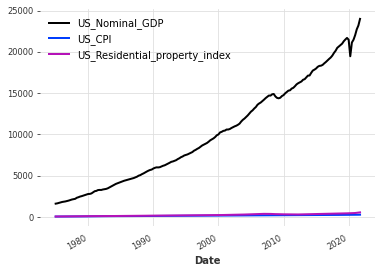

In [ ]:
series.plot()

In [ ]:
train_series, val_series = series[:-32], series[-32:]

In [ ]:
scaler= Scaler()
train_series_scaled = scaler.fit_transform(train_series)
val_series_scaled = scaler.transform(val_series)


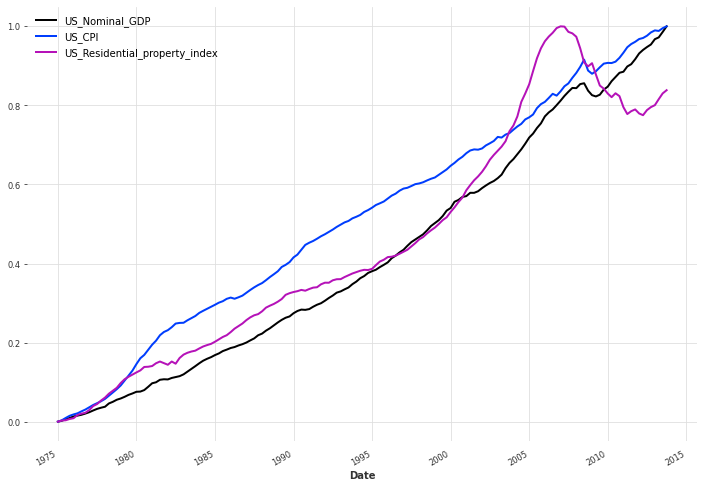

In [ ]:
plt.figure(figsize=(12,8))
train_series_scaled.plot();

**LSTM**

In [ ]:
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import r2_score, mse,mae

In [ ]:
rnn_model = RNNModel(
    model = 'LSTM',
    hidden_dim = 128,
    n_rnn_layers=16,
    dropout = 0.25,
    model_name= 'lstm_darts',
    log_tensorboard =True,
    random_state=123, 
    input_chunk_length=12, 
    output_chunk_length=4, 
    n_epochs=200,
    force_reset = True)

In [ ]:
rnn_model.fit(train_series_scaled, verbose = 2)

2022-07-12 05:18:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 132 samples.
2022-07-12 05:18:03 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-12 05:18:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 05:18:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 05:18:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 05:18:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 05:18:03 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.0 M 
4 

Training: 0it [00:00, ?it/s]

In [ ]:
def eval_model(model):
    forecast = model.predict(n=32)
    print("model {} obtains MSE: {:.2f}%".format(model, mse(actual_series = val_series_scaled, pred_series=forecast)))
    print("model {} obtains MAE: {:.2f}%".format(model, mae(actual_series = val_series_scaled, pred_series=forecast)))
    print("model {} obtains R2: {:.2f}%".format(model, r2_score(actual_series = val_series_scaled, pred_series=forecast)))
    plt.figure(figsize=(16,8))
    train_series_scaled.plot(label='Traingng')
    #val_series_scaled.plot(label='validation')
    forecast.plot(label='Forecasting')
    plt.legend()
    plt.show()

Predicting: 5it [00:00, ?it/s]

model <darts.models.forecasting.rnn_model.RNNModel object at 0x7ff7c6086c10> obtains MSE: 0.44%
model <darts.models.forecasting.rnn_model.RNNModel object at 0x7ff7c6086c10> obtains MAE: 0.64%
model <darts.models.forecasting.rnn_model.RNNModel object at 0x7ff7c6086c10> obtains R2: -43.46%


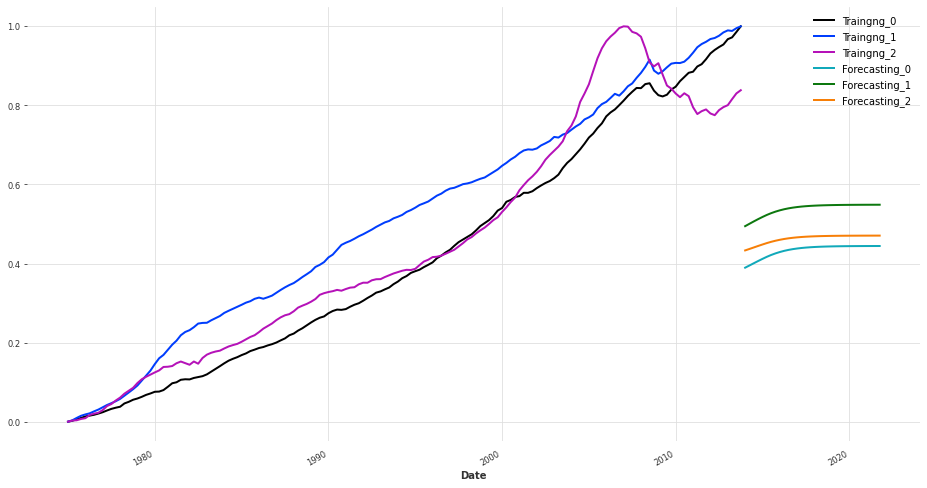

In [ ]:
eval_model(rnn_model)

Predicting: 5it [00:00, ?it/s]

model <darts.models.forecasting.rnn_model.RNNModel object at 0x7fd9e9aa6d50> obtains MSE: 0.33%
model <darts.models.forecasting.rnn_model.RNNModel object at 0x7fd9e9aa6d50> obtains MAE: 0.53%
model <darts.models.forecasting.rnn_model.RNNModel object at 0x7fd9e9aa6d50> obtains R2: -29.94%


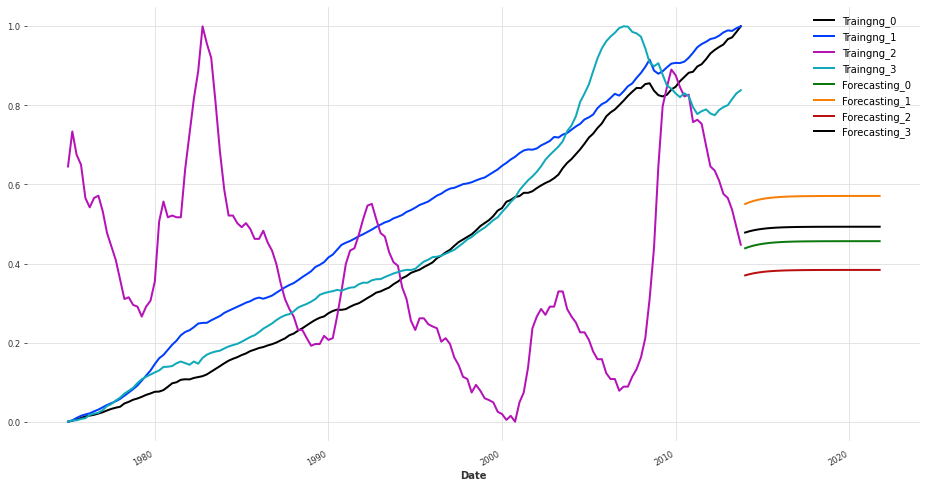

In [ ]:
eval_model(rnn_model)

In [ ]:
type(train_series_scaled)

darts.timeseries.TimeSeries

In [ ]:
# forecast = rnn_model.predict(n=32)
# #forecast_df = forecast.pd_dataframe(copy=True)
# forecast_df_rescaled = scaler.inverse_transform(forecast)
# forecast_df_rescaled

## Different Models

**TCN**


In [ ]:
tcn_model = TCNModel(
    input_chunk_length=12, 
    output_chunk_length=4, 
    force_reset = True,
    num_filters = 64,
    weight_norm =True,
    dropout = 0.25,
    model_name= 'tcn_darts',
    random_state=123, 
    n_epochs=200)

In [ ]:
tcn_model.fit(train_series_scaled, verbose=1)

2022-07-12 05:41:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 141 samples.
2022-07-12 05:41:34 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-12 05:41:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-12 05:41:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 05:41:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 05:41:34 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 05:41:34 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 05:41:34 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c5dfb090> obtains MSE: 0.13%
model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c5dfb090> obtains MAE: 0.23%
model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c5dfb090> obtains R2: -4.39%


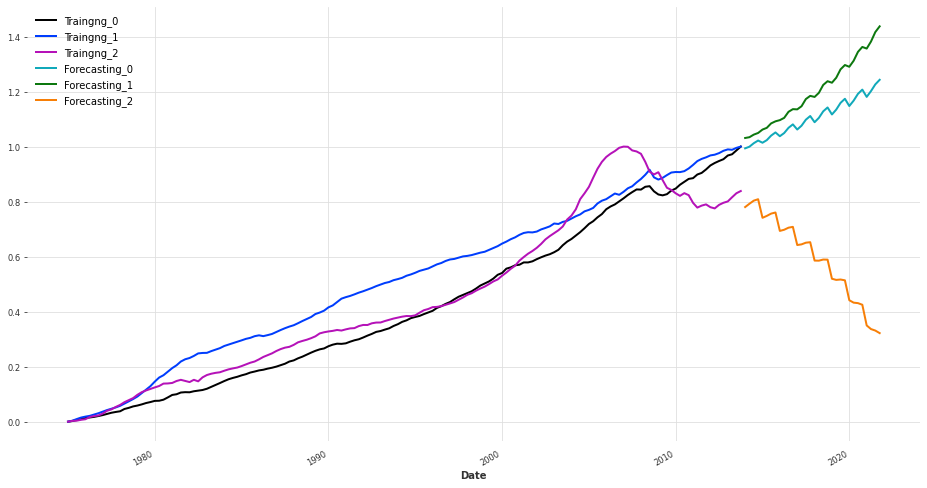

In [ ]:
eval_model(tcn_model)

In [ ]:
# Trying TCN with all US incl Unemployment Rate

us_df_full = mev_imputed[['US_Nominal_GDP', 'US_CPI','US_Unemployment_rate', 'US_Residential_property_index']]
series_allUS = TimeSeries.from_dataframe(us_df_full)

In [ ]:
train_series_us, val_series_us = series_allUS[:-32], series_allUS[-32:]

scaler= Scaler()
train_series_us_scaled = scaler.fit_transform(train_series_us)
val_series_us_scaled = scaler.transform(val_series_us)

In [ ]:
tcn_model2 = TCNModel(
    input_chunk_length=12, 
    output_chunk_length=4, 
    force_reset = True,
    num_filters = 64,
    weight_norm =True,
    dropout = 0.25,
    model_name= 'tcn2_darts',
    random_state=123, 
    n_epochs=200)

In [ ]:
tcn_model2.fit(train_series_us_scaled, verbose=1)

2022-07-12 05:57:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 141 samples.
2022-07-12 05:57:31 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-12 05:57:31 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-12 05:57:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 05:57:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 05:57:31 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 05:57:31 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 05:57:31 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 

Training: 0it [00:00, ?it/s]

In [ ]:
def eval_model2(model):
    forecast = model.predict(n=len(val_series_us))
    print("model {} obtains MSE: {:.2f}%".format(model, mse(actual_series = val_series_us_scaled, pred_series=forecast)))
    print("model {} obtains MAE: {:.2f}%".format(model, mae(actual_series = val_series_us_scaled, pred_series=forecast)))
    print("model {} obtains R2: {:.2f}%".format(model, r2_score(actual_series = val_series_us_scaled, pred_series=forecast)))
    plt.figure(figsize=(16,8))
    train_series_us_scaled.plot(label='Traingng')
    #val_series_scaled.plot(label='validation')
    forecast.plot(label='Forecasting')
    plt.legend()
    plt.show()

Predicting: 5it [00:00, ?it/s]

model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c4a6ff10> obtains MSE: 0.08%
model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c4a6ff10> obtains MAE: 0.18%
model <darts.models.forecasting.tcn_model.TCNModel object at 0x7ff7c4a6ff10> obtains R2: -0.68%


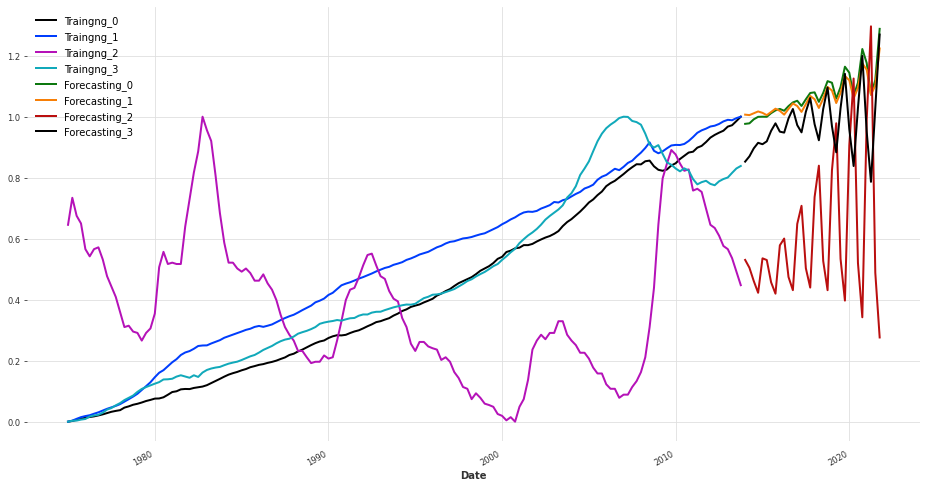

In [ ]:
eval_model2(tcn_model2)

**Nbeats**

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import R2Score

In [ ]:
nbeat_model = NBEATSModel(
    input_chunk_length=12, 
    output_chunk_length=4,
    generic_architecture=False, 
    force_reset = True,
   # num_filters = 64,
   # weight_norm =True,
    dropout = 0.25,
    model_name= 'nbeat_darts',
    random_state=123, 
    n_epochs=200,
   #trend_polynomial_degree=2,
#   torch_metrics=R2Score(num_outputs=4,multioutput='raw_values')
)

In [ ]:
nbeat_model.fit(train_series_us_scaled, verbose=1)

2022-07-12 06:23:42 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 141 samples.
2022-07-12 06:23:42 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-12 06:23:42 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:23:42 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:23:42 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:23:42 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:23:42 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 440 K 
--

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7ff7c484ea90> obtains MSE: 0.08%
model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7ff7c484ea90> obtains MAE: 0.22%
model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7ff7c484ea90> obtains R2: -1.57%


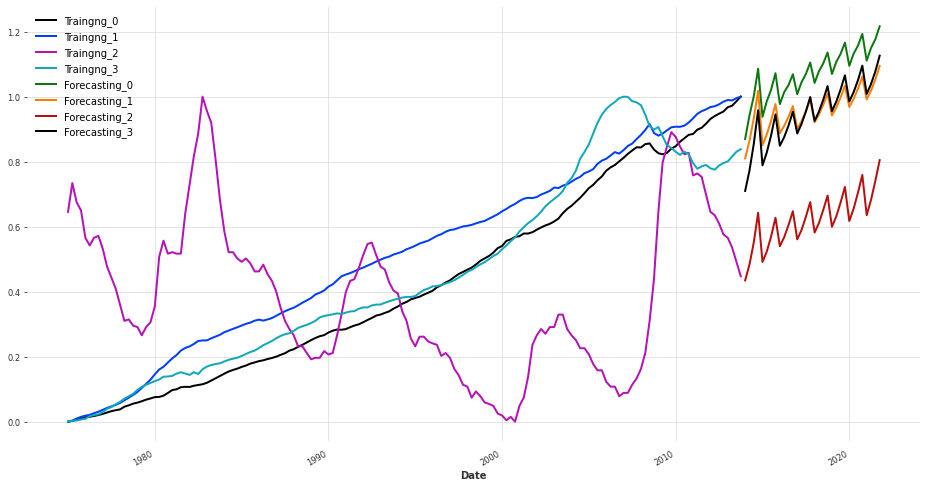

In [ ]:
eval_model2(nbeat_model)

In [ ]:
# comparing how the model would have performed in history

hist_forecasting = nbeat_model.historical_forecasts(series=train_series_us_scaled,
                                                    start=0.5,
                                                    forecast_horizon=4,
                                                    stride=4,
                                                    last_points_only=False)



2022-07-12 06:36:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 62 samples.
2022-07-12 06:36:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:36:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:36:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:36:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:36:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

2022-07-12 06:36:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 66 samples.
2022-07-12 06:36:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:36:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:36:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:36:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:36:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:37:07 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-12 06:37:07 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:37:07 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:37:07 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:37:07 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:37:07 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:37:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 74 samples.
2022-07-12 06:37:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:37:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:37:28 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:37:28 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:37:28 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:37:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 78 samples.
2022-07-12 06:37:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:37:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:37:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:37:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:37:50 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:38:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 82 samples.
2022-07-12 06:38:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:38:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:38:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:38:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:38:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:38:38 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 86 samples.
2022-07-12 06:38:38 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:38:38 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:38:38 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:38:38 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:38:38 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:39:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 90 samples.
2022-07-12 06:39:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:39:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:39:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:39:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:39:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:39:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 94 samples.
2022-07-12 06:39:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:39:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:39:47 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:39:47 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:39:47 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:40:22 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 98 samples.
2022-07-12 06:40:22 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:40:22 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:40:22 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:40:22 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:40:22 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:41:07 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 102 samples.
2022-07-12 06:41:07 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:41:07 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:41:07 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:41:07 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:41:07 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:41:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 106 samples.
2022-07-12 06:41:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:41:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:41:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:41:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:41:50 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:42:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 110 samples.
2022-07-12 06:42:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:42:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:42:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:42:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:42:18 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:42:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 114 samples.
2022-07-12 06:42:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:42:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:42:47 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:42:47 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:42:47 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:43:15 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 118 samples.
2022-07-12 06:43:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:43:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:43:15 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:43:15 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:43:15 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:43:43 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 122 samples.
2022-07-12 06:43:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:43:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:43:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:43:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:43:43 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:44:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 126 samples.
2022-07-12 06:44:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:44:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:44:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:44:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:44:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 06:44:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 130 samples.
2022-07-12 06:44:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:44:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:44:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:44:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:44:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 06:45:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 134 samples.
2022-07-12 06:45:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:45:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:45:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:45:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:45:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

In [ ]:
# comparing how the model would have performed in history

hist_forecasting = nbeat_model.backtest(series=train_series_us_scaled,
                                                    start=0.5,
                                                    forecast_horizon=4,
                                                    stride=1,
                                                    last_points_only=False,
                                                    metric =r2_score,
                                                    reduction=None 
                                        )



2022-07-12 06:48:38 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 62 samples.
2022-07-12 06:48:38 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:48:38 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:48:38 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:48:38 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:48:38 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-12 06:48:44 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 63 samples.
2022-07-12 06:48:44 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:48:44 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:48:44 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:48:44 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:48:44 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-12 06:48:48 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 64 samples.
2022-07-12 06:48:48 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:48:48 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:48:48 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:48:48 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:48:48 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

2022-07-12 06:49:06 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 65 samples.
2022-07-12 06:49:06 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:49:06 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:49:06 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:49:06 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:49:06 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-12 06:49:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 66 samples.
2022-07-12 06:49:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:49:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:49:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:49:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:49:13 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:49:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 67 samples.
2022-07-12 06:49:32 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:49:32 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:49:32 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:49:32 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:49:32 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:49:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 68 samples.
2022-07-12 06:49:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:49:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:49:53 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:49:53 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:49:53 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:50:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 69 samples.
2022-07-12 06:50:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:50:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:50:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:50:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:50:13 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:50:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-12 06:50:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:50:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:50:34 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:50:34 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:50:34 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:50:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 71 samples.
2022-07-12 06:50:55 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:50:55 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:50:55 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:50:55 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:50:55 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:51:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 72 samples.
2022-07-12 06:51:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:51:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:51:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:51:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:51:16 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:51:37 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 73 samples.
2022-07-12 06:51:37 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:51:37 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:51:37 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:51:37 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:51:37 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:51:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 74 samples.
2022-07-12 06:51:58 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:51:58 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:51:58 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:51:58 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:51:58 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:52:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 75 samples.
2022-07-12 06:52:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:52:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:52:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:52:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:52:18 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:52:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 76 samples.
2022-07-12 06:52:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:52:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:52:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:52:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:52:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:53:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 77 samples.
2022-07-12 06:53:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:53:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:53:01 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:53:01 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:53:01 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:53:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 78 samples.
2022-07-12 06:53:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:53:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:53:23 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:53:23 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:53:23 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:53:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 79 samples.
2022-07-12 06:53:46 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:53:46 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:53:46 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:53:46 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:53:46 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:54:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 80 samples.
2022-07-12 06:54:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:54:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:54:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:54:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:54:10 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:54:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 81 samples.
2022-07-12 06:54:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:54:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:54:34 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:54:34 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:54:34 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:55:00 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 82 samples.
2022-07-12 06:55:00 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:55:00 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:55:00 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:55:00 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:55:00 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:55:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 83 samples.
2022-07-12 06:55:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:55:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:55:23 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:55:23 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:55:23 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:55:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-12 06:55:46 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:55:46 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:55:46 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:55:46 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:55:46 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:56:08 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 85 samples.
2022-07-12 06:56:08 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:56:08 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:56:08 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:56:08 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:56:08 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:56:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 86 samples.
2022-07-12 06:56:30 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:56:30 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:56:30 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:56:30 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:56:30 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:56:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 87 samples.
2022-07-12 06:56:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:56:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:56:53 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:56:53 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:56:53 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:57:17 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 88 samples.
2022-07-12 06:57:17 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:57:17 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:57:17 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:57:17 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:57:17 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:57:42 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 89 samples.
2022-07-12 06:57:42 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:57:42 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:57:42 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:57:42 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:57:42 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:58:04 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 90 samples.
2022-07-12 06:58:04 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:58:04 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:58:04 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:58:04 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:58:04 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:58:27 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 91 samples.
2022-07-12 06:58:27 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:58:27 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:58:27 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:58:27 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:58:27 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:58:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 92 samples.
2022-07-12 06:58:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:58:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:58:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:58:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:58:50 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:59:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 93 samples.
2022-07-12 06:59:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:59:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:59:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:59:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:59:13 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 06:59:37 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 94 samples.
2022-07-12 06:59:37 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 06:59:37 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 06:59:37 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 06:59:37 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 06:59:37 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 07:00:02 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 95 samples.
2022-07-12 07:00:02 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:00:02 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:00:02 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:00:02 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:00:02 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 07:00:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 96 samples.
2022-07-12 07:00:26 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:00:26 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:00:26 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:00:26 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:00:26 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 3it [00:00, ?it/s]

2022-07-12 07:00:51 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 97 samples.
2022-07-12 07:00:51 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:00:51 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:00:51 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:00:51 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:00:51 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:01:19 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 98 samples.
2022-07-12 07:01:19 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:01:19 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:01:19 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:01:19 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:01:19 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:01:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 99 samples.
2022-07-12 07:01:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:01:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:01:47 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:01:47 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:01:47 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additiona

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:02:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 100 samples.
2022-07-12 07:02:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:02:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:02:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:02:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:02:16 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:02:44 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 101 samples.
2022-07-12 07:02:44 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:02:44 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:02:44 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:02:44 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:02:44 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:03:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 102 samples.
2022-07-12 07:03:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:03:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:03:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:03:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:03:13 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:03:42 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 103 samples.
2022-07-12 07:03:42 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:03:42 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:03:42 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:03:42 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:03:42 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:04:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 104 samples.
2022-07-12 07:04:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:04:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:04:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:04:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:04:11 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:04:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 105 samples.
2022-07-12 07:04:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:04:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:04:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:04:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:04:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:05:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 106 samples.
2022-07-12 07:05:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:05:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:05:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:05:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:05:11 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:05:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 107 samples.
2022-07-12 07:05:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:05:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:05:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:05:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:05:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:06:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 108 samples.
2022-07-12 07:06:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:06:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:06:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:06:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:06:10 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:06:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 109 samples.
2022-07-12 07:06:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:06:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:06:40 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:06:40 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:06:40 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:07:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 110 samples.
2022-07-12 07:07:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:07:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:07:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:07:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:07:10 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:07:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 111 samples.
2022-07-12 07:07:39 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:07:39 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:07:39 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:07:39 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:07:39 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:08:08 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 112 samples.
2022-07-12 07:08:08 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:08:08 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:08:08 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:08:08 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:08:08 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:08:37 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 113 samples.
2022-07-12 07:08:37 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:08:37 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:08:37 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:08:37 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:08:37 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:09:06 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 114 samples.
2022-07-12 07:09:06 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:09:06 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:09:06 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:09:06 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:09:06 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:09:36 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 115 samples.
2022-07-12 07:09:36 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:09:36 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:09:36 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:09:36 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:09:36 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:10:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 116 samples.
2022-07-12 07:10:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:10:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:10:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:10:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:10:18 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:10:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 117 samples.
2022-07-12 07:10:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:10:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:10:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:10:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:10:50 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:11:20 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 118 samples.
2022-07-12 07:11:20 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:11:20 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:11:20 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:11:20 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:11:20 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:11:51 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 119 samples.
2022-07-12 07:11:51 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:11:51 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:11:51 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:11:51 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:11:51 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:12:21 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 120 samples.
2022-07-12 07:12:22 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:12:22 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:12:22 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:12:22 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:12:22 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:12:51 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 121 samples.
2022-07-12 07:12:51 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:12:51 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:12:51 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:12:51 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:12:51 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:13:20 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 122 samples.
2022-07-12 07:13:20 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:13:20 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:13:20 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:13:20 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:13:20 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:13:49 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 123 samples.
2022-07-12 07:13:49 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:13:49 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:13:49 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:13:49 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:13:49 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:14:17 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 124 samples.
2022-07-12 07:14:17 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:14:17 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:14:17 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:14:17 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:14:17 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:14:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 125 samples.
2022-07-12 07:14:46 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:14:46 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:14:46 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:14:46 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:14:46 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:15:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 126 samples.
2022-07-12 07:15:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:15:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:15:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:15:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:15:16 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:15:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 127 samples.
2022-07-12 07:15:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:15:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:15:47 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:15:47 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:15:47 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:16:19 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 128 samples.
2022-07-12 07:16:19 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:16:19 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:16:19 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:16:19 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:16:19 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 4it [00:00, ?it/s]

2022-07-12 07:16:50 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 129 samples.
2022-07-12 07:16:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:16:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:16:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:16:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:16:50 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:17:27 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 130 samples.
2022-07-12 07:17:27 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:17:27 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:17:27 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:17:27 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:17:27 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:18:02 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 131 samples.
2022-07-12 07:18:02 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:18:02 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:18:02 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:18:02 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:18:02 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:18:37 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 132 samples.
2022-07-12 07:18:37 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:18:37 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:18:37 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:18:37 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:18:37 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:19:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 133 samples.
2022-07-12 07:19:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:19:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:19:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:19:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:19:11 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:19:45 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 134 samples.
2022-07-12 07:19:45 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:19:45 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:19:45 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:19:45 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:19:45 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:20:20 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 135 samples.
2022-07-12 07:20:20 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:20:20 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:20:20 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:20:20 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:20:20 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:20:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 136 samples.
2022-07-12 07:20:55 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:20:55 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:20:55 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:20:55 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:20:55 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-12 07:21:30 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 137 samples.
2022-07-12 07:21:30 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-12 07:21:30 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-12 07:21:30 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-12 07:21:30 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-12 07:21:30 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some addition

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

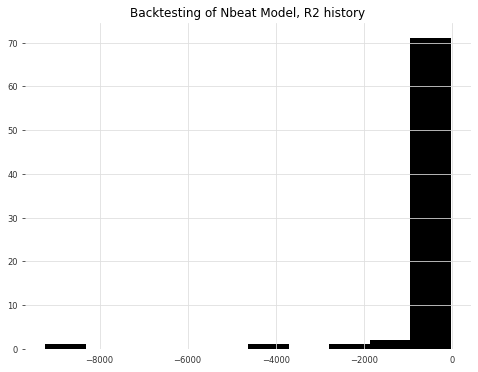

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(hist_forecasting)
plt.title('Backtesting of Nbeat Model, R2 history');